# Basic Exploratory Data Analysis

https://www.dmitrymakarov.ru/data-analysis/eda-04/  
https://www.kaggle.com/code/emstrakhov/lesson-1-eda-with-pandas

- Предварительный просмотр данных
  - df.sample(5)
- Переименование полей
  - df.columns = df.columns.str.lower().str.replace(' ',  '\_')
- Общее количество записей и типы столбцов
  - df.shape, 
  - df.info()
- Проверить любые нулевые значения
  - df.isnull().sum(), 
  - df.isnull().sum() / df.shape[0]
- Проверить дубликаты записей
  - df[df.duplicated()].shape[0], 
  - df[df.duplicated()].shape[0] / df.shape[0], 
  - df.drop_duplicates(subset=None, keep=’first’, inplace=False)
- Преобразование типов данных
  - df.describe(include='object'),
  - время df.pickup = pd.to_datetime(df.pickup),
  - категориальные типы данных (при небольшом количестве значений?)  
    for col in ('color', 'payment', 'pickup_borough', 'dropoff_borough'):
    df[col] = df[col].astype('category')
- ВременнЫе границы, пропущенные периоды
  - мин, макс,
  - разница (макс - мин) + 1 - количеством имеющихся периодов,
  - барплот "периоды - количество строк"
-----
Одномерный анализ
- Посмотреть временные ряды числовых данных (средние?) (по дням, месяцам и годам?). Тенденции, периодичность.
- Гистограмма распределения числовых данных
  - одномерное распределение. Посмотреть выбросы, 
  - парное совместное распределение
- Распределение количества данных по категориальным данным sns.histplot(data=df, x='city_category'); или plt.pie(df.gender.value_counts(), labels=['M', 'F'])

Двумерный анализ
Функции распределения цели по пользователям/товарам... purchase_by_user = df.groupby('user_id')['purchase'].sum(); 
Диаграммы Параметры категориальные - цель (цель может быть "разной"? Сумма продаж на категорию, средняя сумма продаж на покупателя из категории, средний чек, среднее количество покупок на покупателя в категории...).  
Двумерные диаграммы. Скаттерплоты, линии регрессии, барплоты категориальные - числовые. На скаттерплоте категории цветом вывести. Удобнее такое смотреть в BI-системе?  
Корреляционные матрицы df.corr().style.background_gradient(cmap='crest'). С версии 1.5.0 можно не только для числовых столбиков  
pairplot для числовых данных sns.pairplot(df)  

sns.ecdfplot(purchase_by_user.values);  
Трехмерные диаграммы. Категория - Категория - Числовые данные (цель). FasetGrid.

удалить выбросы? заполнить недостающие значения? Или это уже для ML?  
```python
q_1, q_3 = np.nanpercentile(df.A, [25, 75])
up_thresh = q_3 + 1.5 * diff_3_1
low_thresh = q_1 - 1.5 * diff_3_1
df.A[(df.A > low_thresh) * (df.A < up_thresh)]
```  
На любом этапе выше прикидывать реалистичность данных.
На любом этапе выше очищать данные от обнаруженных неточностей, несоответствий.
Присоединить новые данные (погода, курсы валют, индексы деловой активности)

Готовые "библиотеки" для анализа
!pip install pandas_profiling --upgrade
from pandas_profiling import ProfileReport
profile = ProfileReport(df)
profile

Самые важные признаки:
```python
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = df[['Возраст', 'Длительность', 'Кампания', 'День', 'Предыдущий контакт', 'Индекс потребительских цен', 'Европейская межбанковская ставка', 'Количество сотрудников в компании']]
y = df.iloc[:, -1]
bestfeatures = SelectKBest(score_func = chi2, k = 'all')
fit = bestfeatures.fit(X, y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns, dfscores], axis = 1)
featureScores.columns = ['Specs', 'Score']  
print(featureScores.nlargest(10, 'Score')) 
```

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = sns.load_dataset('taxis')

In [3]:
df.sample(5)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
5646,2019-03-05 09:01:05,2019-03-05 09:08:45,1,1.35,7.5,0.00,0.00,8.30,green,cash,Coney Island,Brighton Beach,Brooklyn,Brooklyn
1470,2019-03-11 14:27:51,2019-03-11 14:37:40,1,1.52,8.5,2.36,0.00,14.16,yellow,credit card,Upper East Side South,Upper East Side North,Manhattan,Manhattan
2398,2019-03-26 21:20:48,2019-03-26 21:29:46,1,0.00,7.5,0.00,0.00,11.30,yellow,cash,Seaport,Battery Park City,Manhattan,Manhattan
3989,2019-03-30 17:16:54,2019-03-30 17:34:07,1,1.82,12.0,0.00,0.00,15.30,yellow,cash,Greenwich Village North,Kips Bay,Manhattan,Manhattan
2712,2019-03-05 14:11:42,2019-03-05 14:48:45,1,10.53,34.5,5.00,5.76,48.56,yellow,credit card,LaGuardia Airport,East Chelsea,Queens,Manhattan


In [9]:
df.shape

(6433, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pickup           6433 non-null   datetime64[ns]
 1   dropoff          6433 non-null   datetime64[ns]
 2   passengers       6433 non-null   int64         
 3   distance         6433 non-null   float64       
 4   fare             6433 non-null   float64       
 5   tip              6433 non-null   float64       
 6   tolls            6433 non-null   float64       
 7   total            6433 non-null   float64       
 8   color            6433 non-null   object        
 9   payment          6389 non-null   object        
 10  pickup_zone      6407 non-null   object        
 11  dropoff_zone     6388 non-null   object        
 12  pickup_borough   6407 non-null   object        
 13  dropoff_borough  6388 non-null   object        
dtypes: datetime64[ns](2), float64(5), int64(

In [6]:
df.isnull().sum()

pickup              0
dropoff             0
passengers          0
distance            0
fare                0
tip                 0
tolls               0
total               0
color               0
payment            44
pickup_zone        26
dropoff_zone       45
pickup_borough     26
dropoff_borough    45
dtype: int64

In [8]:
df.isnull().sum() / df.shape[0]

pickup             0.000000
dropoff            0.000000
passengers         0.000000
distance           0.000000
fare               0.000000
tip                0.000000
tolls              0.000000
total              0.000000
color              0.000000
payment            0.006840
pickup_zone        0.004042
dropoff_zone       0.006995
pickup_borough     0.004042
dropoff_borough    0.006995
dtype: float64

In [5]:
df[df.duplicated()].shape[0]

0

In [16]:
df[df.duplicated()].shape[0] / df.shape[0]

0.0

In [16]:
df.dtypes

pickup             datetime64[ns]
dropoff            datetime64[ns]
passengers                  int64
distance                  float64
fare                      float64
tip                       float64
tolls                     float64
total                     float64
color                    category
payment                  category
pickup_zone                object
dropoff_zone               object
pickup_borough           category
dropoff_borough          category
dtype: object

In [13]:
df.describe(include='object')

,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
count,6433,6389,6407,6388,6407,6388
unique,2,2,194,203,4,5
top,yellow,credit card,Midtown Center,Upper East Side North,Manhattan,Manhattan
freq,5451,4577,230,245,5268,5206


In [10]:
df.pickup = pd.to_datetime(df.pickup)
df.dropoff = pd.to_datetime(df.dropoff)

In [15]:
for col in ('color', 'payment', 'pickup_borough', 'dropoff_borough'):
    df[col] = df[col].astype('category')

In [23]:
dates = df.pickup.dt.date

In [24]:
dates.min()

datetime.date(2019, 2, 28)

In [25]:
dates.max()

datetime.date(2019, 3, 31)

In [55]:
(dates.max() - dates.min()).days + 1 - dates.groupby(by=dates).count().shape[0]

0

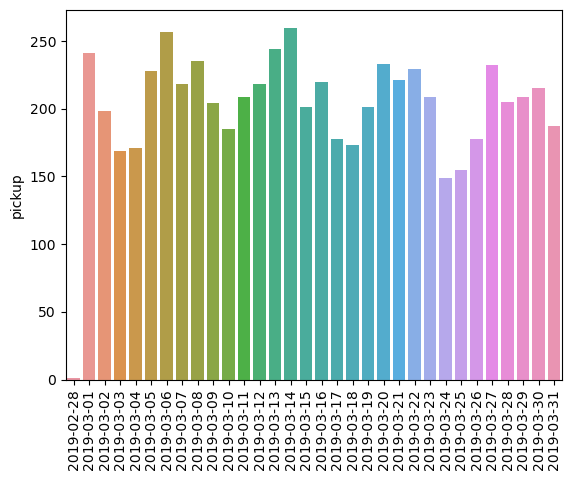

In [38]:
sns.barplot(x=dates.value_counts().sort_index().index, y=dates.value_counts().sort_index())
plt.xticks(rotation=90);

In [15]:
df.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [ ]:
df.select_dtypes(include=['int', 'float'], exclude=None).columns

Index(['passengers', 'distance', 'fare', 'tip', 'tolls', 'total'], dtype='object')

In [5]:
# https://gist.github.com/jiahao87/c97214065f996b76ab8fe4ca1964b2b5

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
# import missingno
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

        
def time_series_plot(df):
    """Given dataframe, generate times series plot of numeric data by daily, monthly and yearly frequency"""
    print("\nTo check time series of numeric data  by daily, monthly and yearly frequency")
    if len(df.select_dtypes(include='datetime64').columns)>0:
        for col in df.select_dtypes(include='datetime64').columns:
            for p in ['D', 'M', 'Y']:
                if p=='D':
                    print("Plotting daily data")
                elif p=='M':
                    print("Plotting monthly data")
                else:
                    print("Plotting yearly data")
                for col_num in df.select_dtypes(include=np.number).columns:
                    __ = df.copy()
                    __ = __.set_index(col)
                    __T = __.resample(p).sum()
                    ax = __T[[col_num]].plot()
                    ax.set_ylim(bottom=0)
                    ax.get_yaxis().set_major_formatter(
                    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
                    plt.show()

                    
def numeric_eda(df, hue=None):
    """Given dataframe, generate EDA of numeric data"""
    print("\nTo check: \nDistribution of numeric data")
    display(df.describe().T)
    columns = df.select_dtypes(include=np.number).columns
    figure = plt.figure(figsize=(20, 10))
    figure.add_subplot(1, len(columns), 1)
    for index, col in enumerate(columns):
        if index > 0:
            figure.add_subplot(1, len(columns), index + 1)
        sns.boxplot(y=col, data=df, boxprops={'facecolor': 'None'})
    figure.tight_layout()
    plt.show()
    
    if len(df.select_dtypes(include='category').columns) > 0:
        for col_num in df.select_dtypes(include=np.number).columns:
            for col in df.select_dtypes(include='category').columns:
                fig = sns.catplot(x=col, y=col_num, kind='violin', data=df, height=5, aspect=2)
                fig.set_xticklabels(rotation=90)
                plt.show()
    
    # Plot the pairwise joint distributions
    print("\nTo check pairwise joint distribution of numeric data")
    if hue==None:
        sns.pairplot(df.select_dtypes(include=np.number))
    else:
        sns.pairplot(df.select_dtypes(include=np.number).join(df[[hue]]), hue=hue)
    plt.show()


def top5(df):
    """Given dataframe, generate top 5 unique values for non-numeric data"""
    columns = df.select_dtypes(include=['object', 'category']).columns
    for col in columns:
        print("Top 5 unique values of " + col)
        print(df[col].value_counts().reset_index().rename(columns={"index": col, col: "Count"})[
              :min(5, len(df[col].value_counts()))])
        print(" ")
    
    
def categorical_eda(df, hue=None):
    """Given dataframe, generate EDA of categorical data"""
    print("\nTo check: \nUnique count of non-numeric data\n")
    print(df.select_dtypes(include=['object', 'category']).nunique())
    top5(df)
    # Plot count distribution of categorical data
    for col in df.select_dtypes(include='category').columns:
        fig = sns.catplot(x=col, kind="count", data=df, hue=hue)
        fig.set_xticklabels(rotation=90)
        plt.show()
    

def eda(df):
    """Given dataframe, generate exploratory data analysis"""
    # check that input is pandas dataframe
    if type(df) != pd.core.frame.DataFrame:
        raise TypeError("Only pandas dataframe is allowed as input")
        
    # replace field that's entirely space (or empty) with NaN
    df = df.replace(r'^\s*$', np.nan, regex=True)

    print("Preview of data:")
    display(df.head(3))

    print("\nTo check: \n (1) Total number of entries \n (2) Column types \n (3) Any null values\n")
    print(df.info())

    # generate preview of entries with null values
#     if df.isnull().any(axis=None):
#         print("\nPreview of data with null values:")
#         display(df[df.isnull().any(axis=1)].head(3))
#         missingno.matrix(df)
#         plt.show()

    # generate count statistics of duplicate entries
    if len(df[df.duplicated()]) > 0:
        print("\n***Number of duplicated entries: ", len(df[df.duplicated()]))
        display(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head())
    else:
        print("\nNo duplicated entries found")

    # EDA of categorical data
    categorical_eda(df)
    
    # EDA of numeric data
    numeric_eda(df)
        
    # Plot time series plot of numeric data
    time_series_plot(df)

Preview of data:


,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan



To check: 
 (1) Total number of entries 
 (2) Column types 
 (3) Any null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pickup           6433 non-null   datetime64[ns]
 1   dropoff          6433 non-null   datetime64[ns]
 2   passengers       6433 non-null   int64         
 3   distance         6433 non-null   float64       
 4   fare             6433 non-null   float64       
 5   tip              6433 non-null   float64       
 6   tolls            6433 non-null   float64       
 7   total            6433 non-null   float64       
 8   color            6433 non-null   category      
 9   payment          6389 non-null   category      
 10  pickup_zone      6407 non-null   object        
 11  dropoff_zone     6388 non-null   object        
 12  pickup_borough   6407 non-null   category      
 13  dropoff_bo

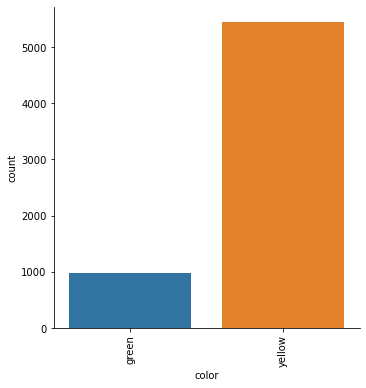

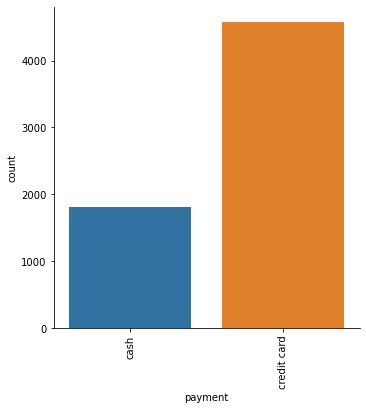

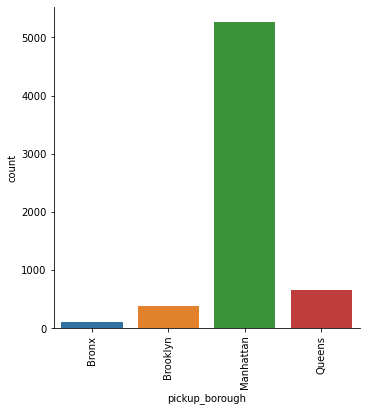

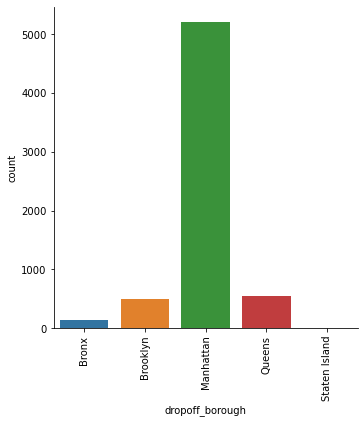


To check: 
Distribution of numeric data


,count,mean,std,min,25%,50%,75%,max
passengers,6433.0,1.539251,1.203768,0.0,1.00,1.00,2.00,6.00
distance,6433.0,3.024617,3.827867,0.0,0.98,1.64,3.21,36.70
fare,6433.0,13.091073,11.551804,1.0,6.50,9.50,15.00,150.00
tip,6433.0,1.979220,2.448560,0.0,0.00,1.70,2.80,33.20
tolls,6433.0,0.325273,1.415267,0.0,0.00,0.00,0.00,24.02
total,6433.0,18.517794,13.815570,1.3,10.80,14.16,20.30,174.82


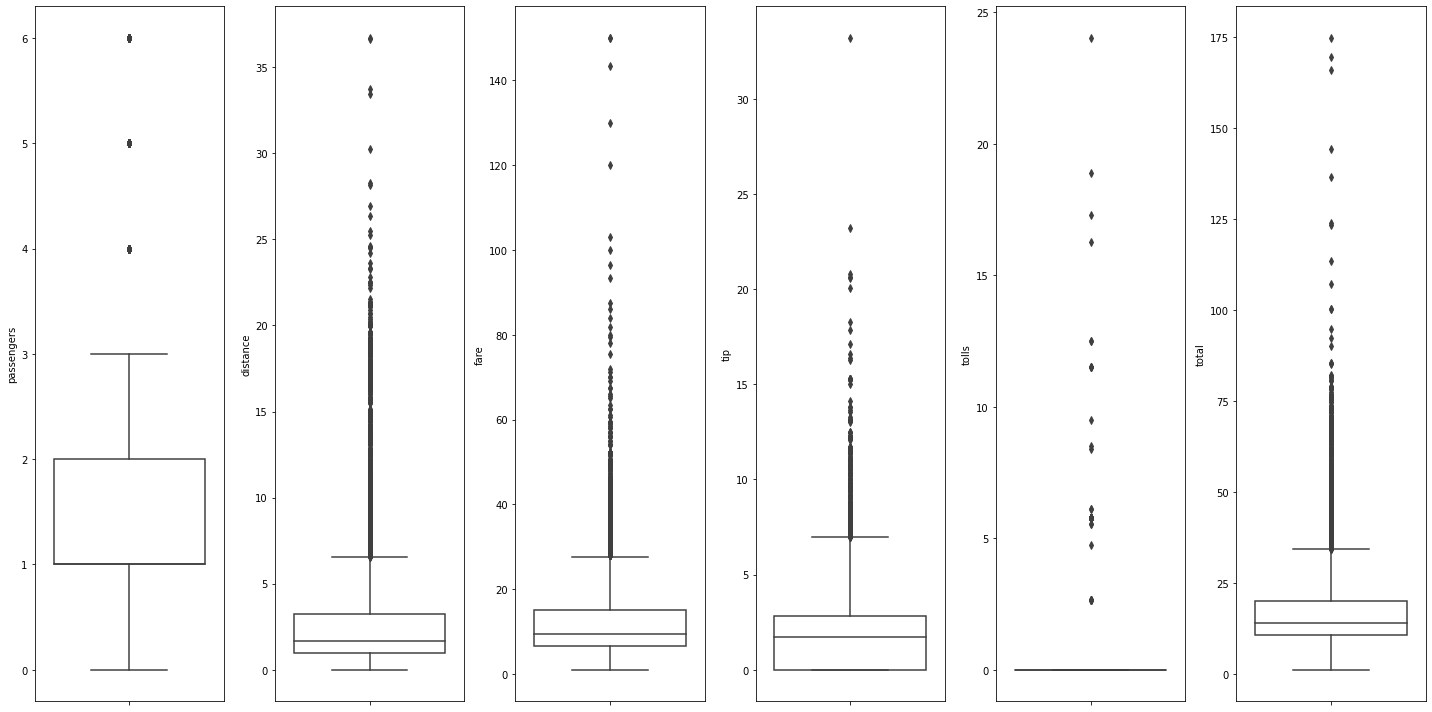

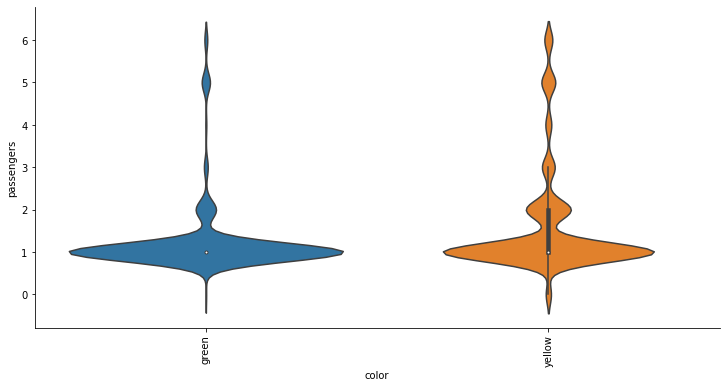

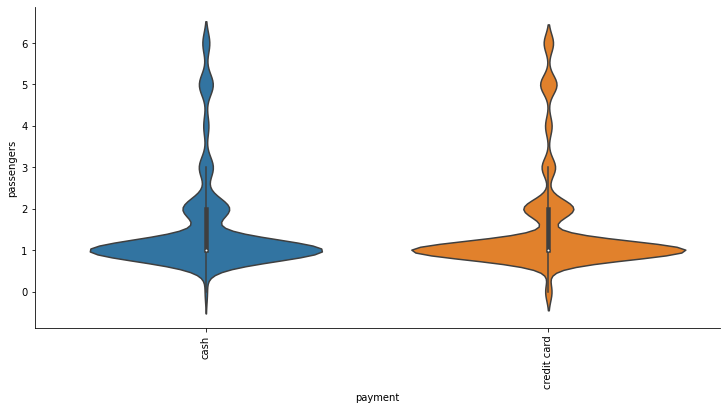

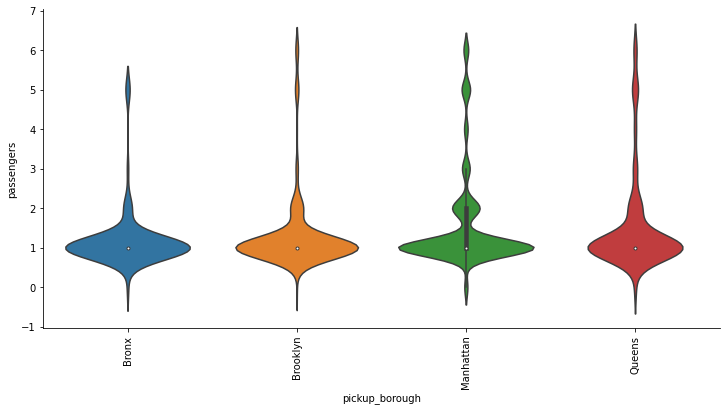

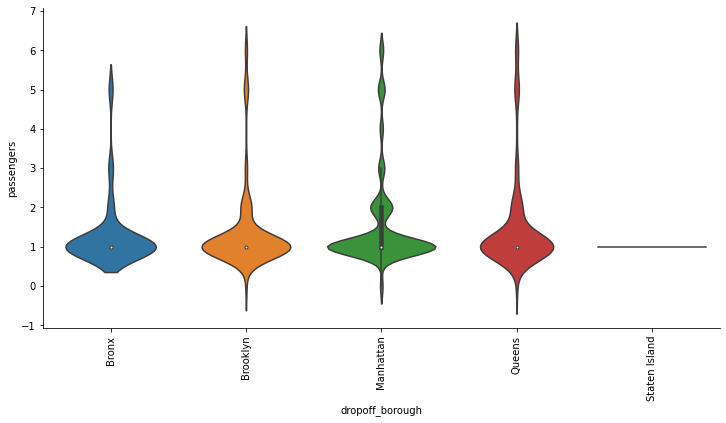

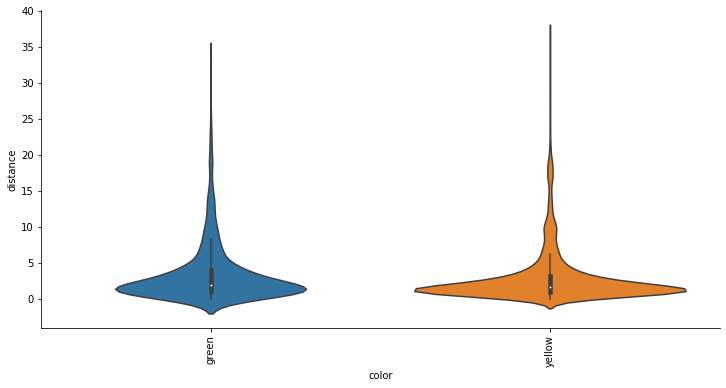

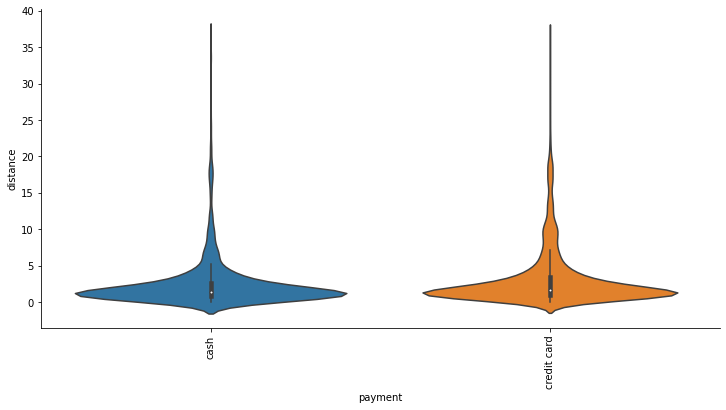

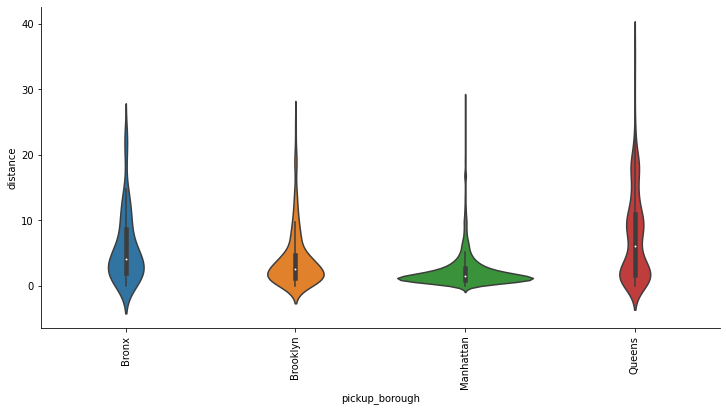

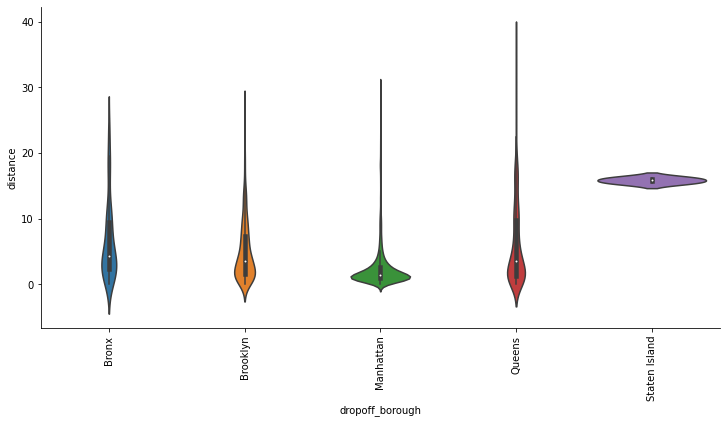

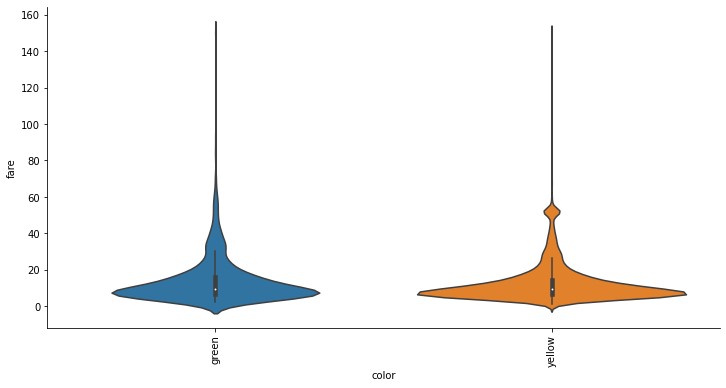

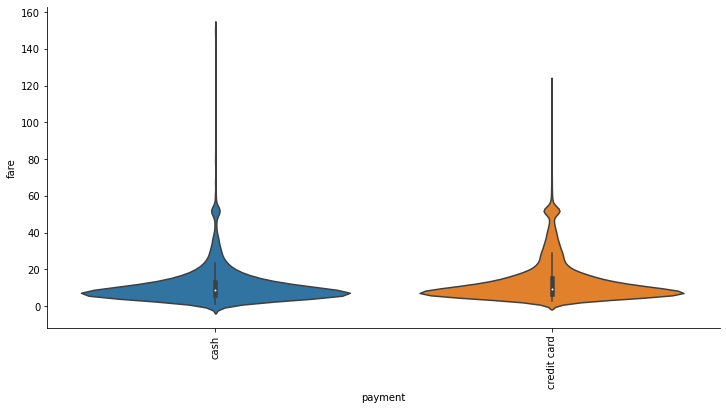

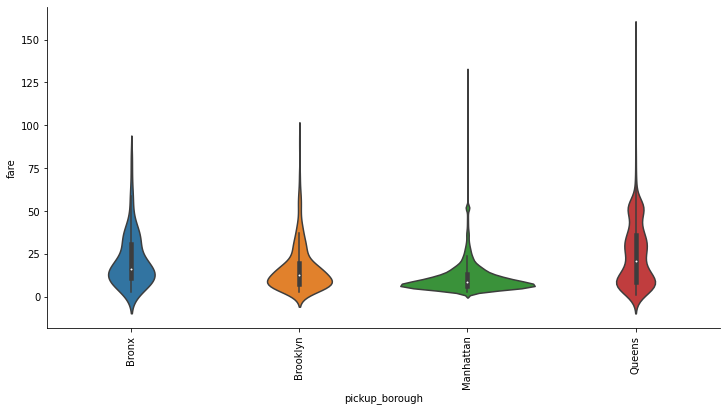

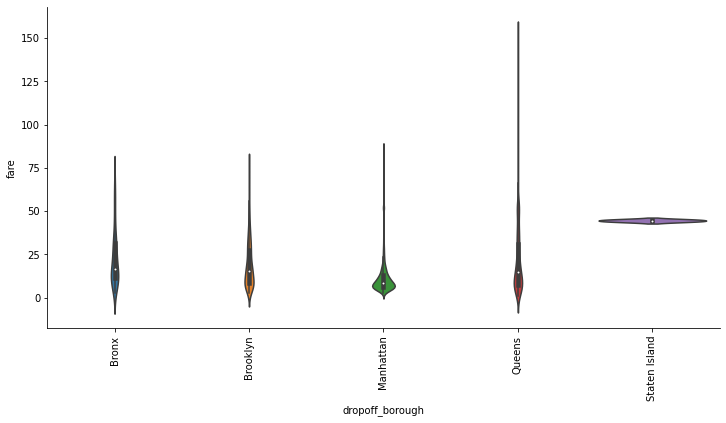

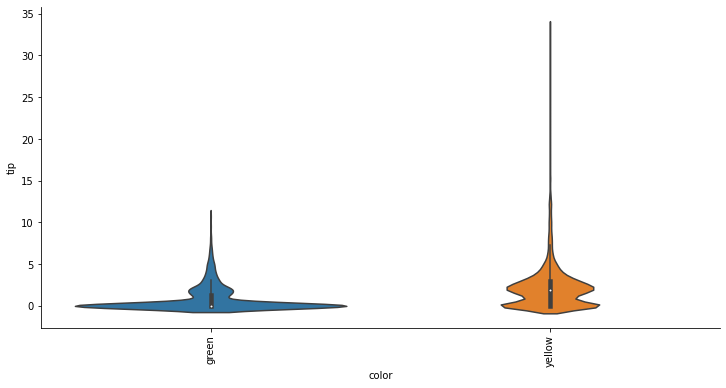

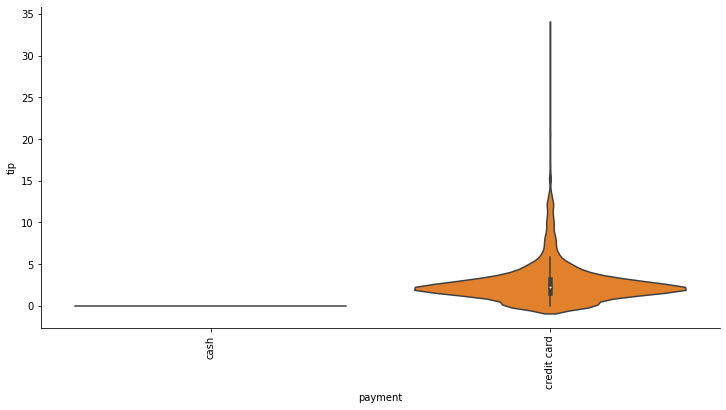

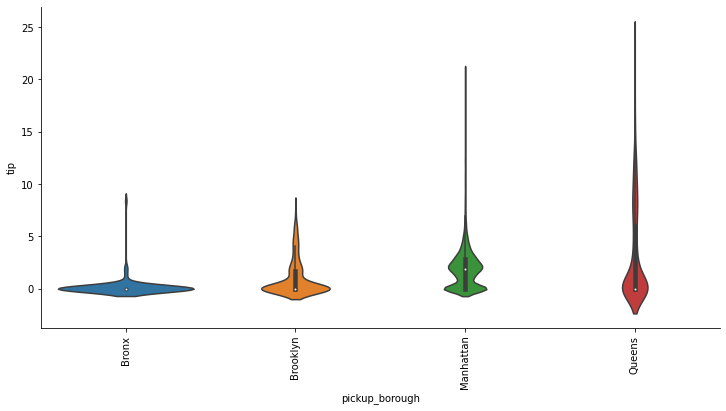

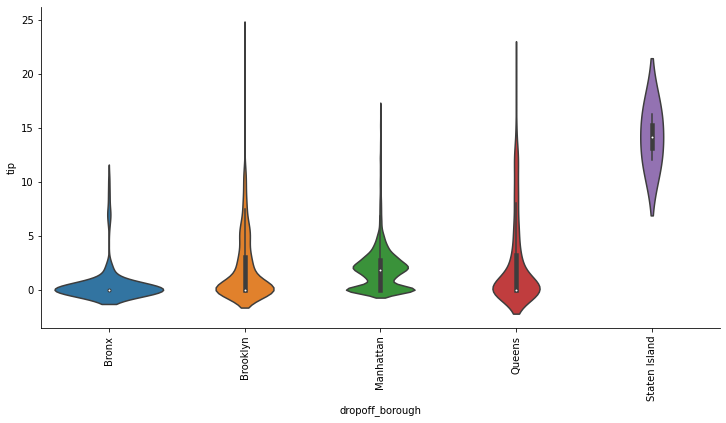

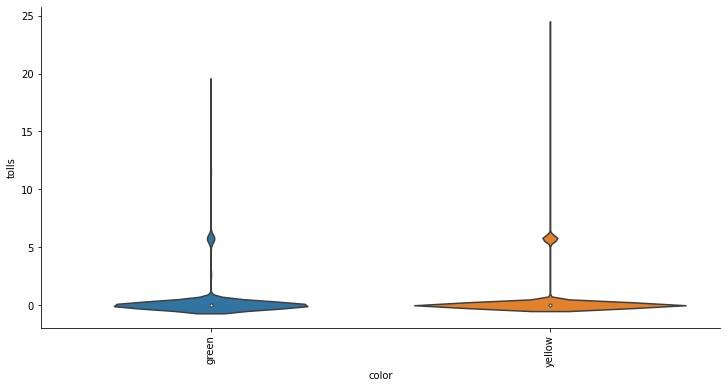

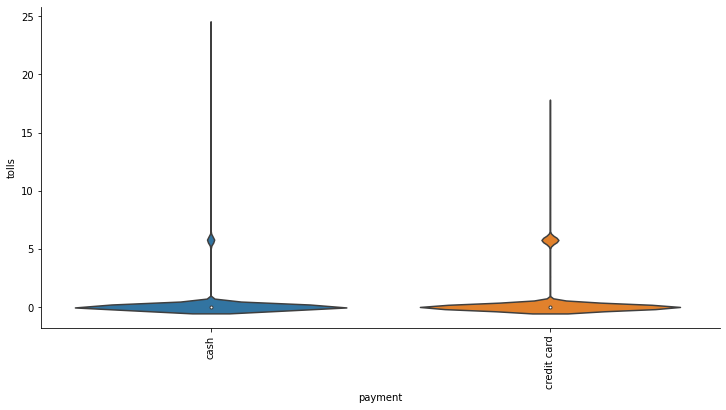

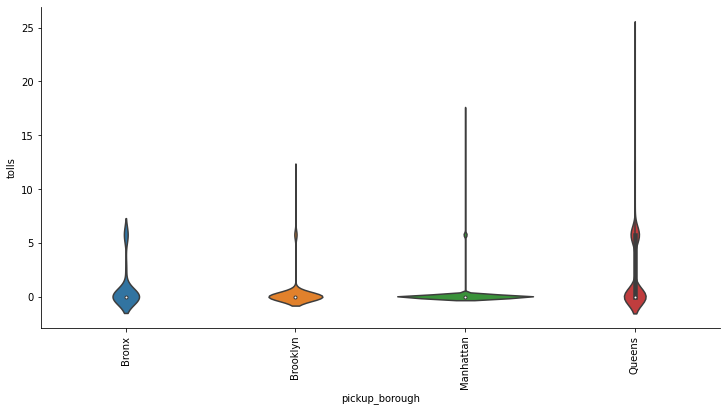

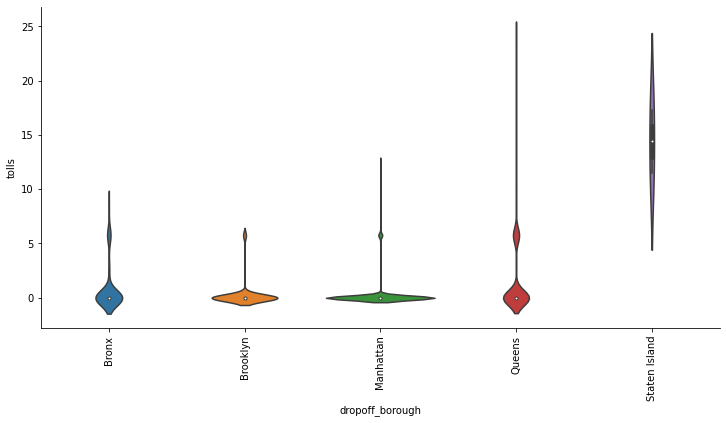

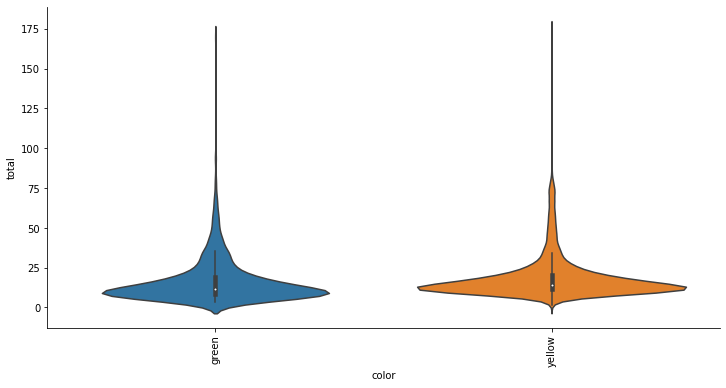

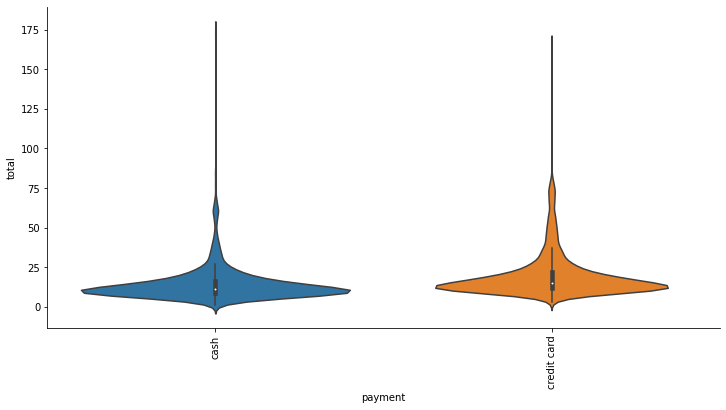

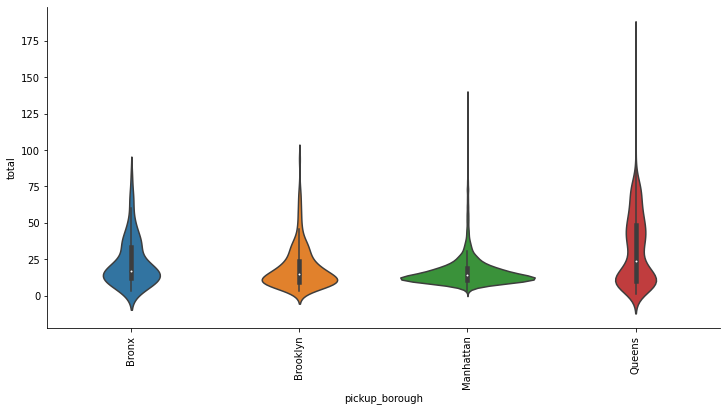

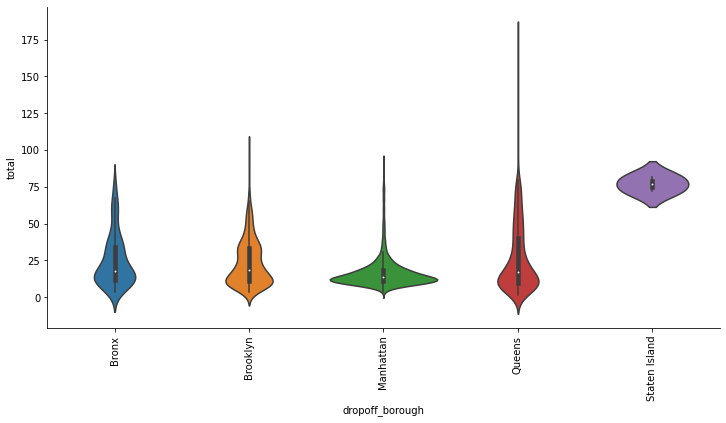


To check pairwise joint distribution of numeric data


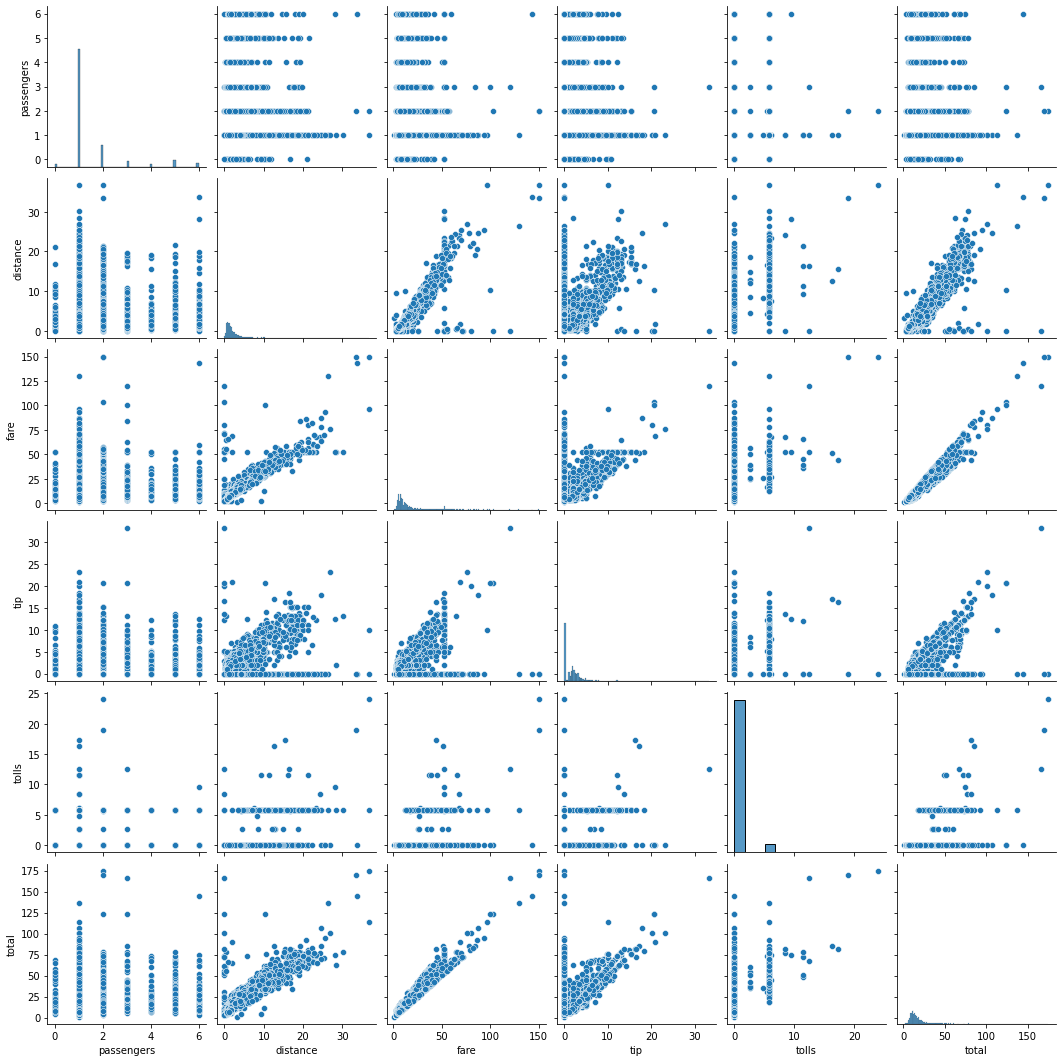


To check time series of numeric data  by daily, monthly and yearly frequency
Plotting daily data


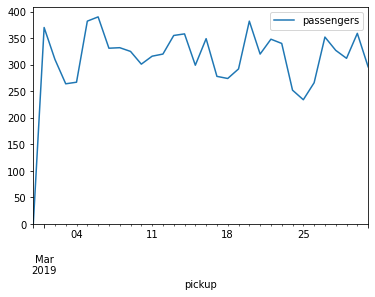

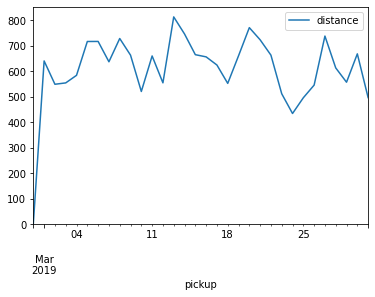

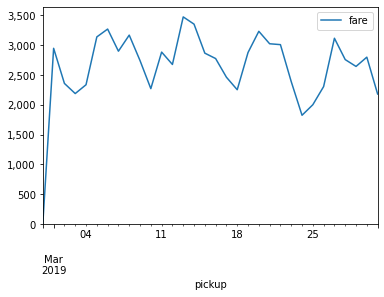

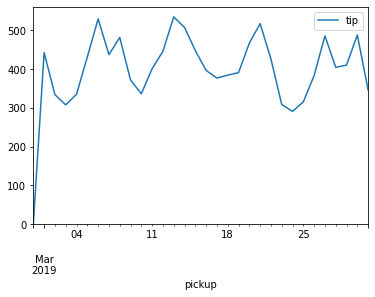

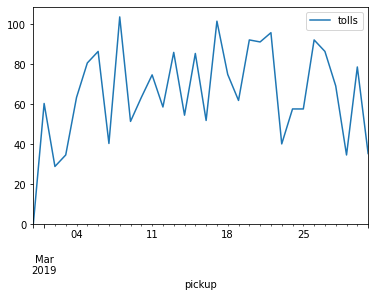

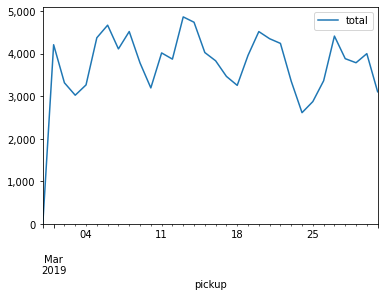

Plotting monthly data


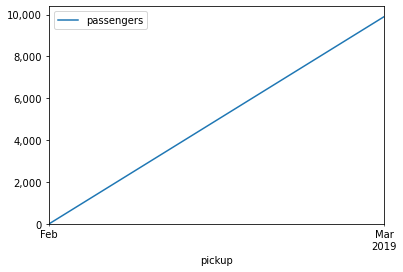

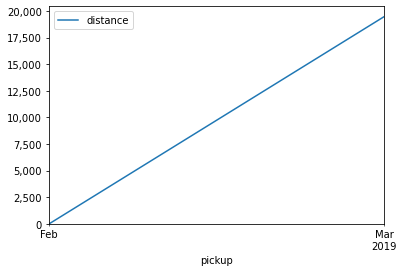

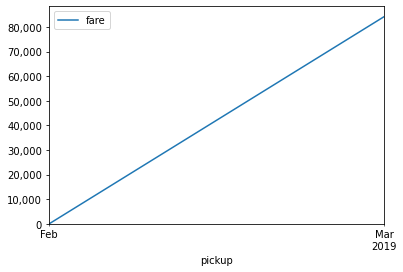

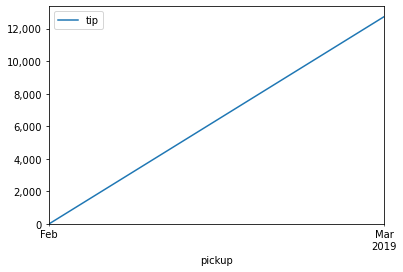

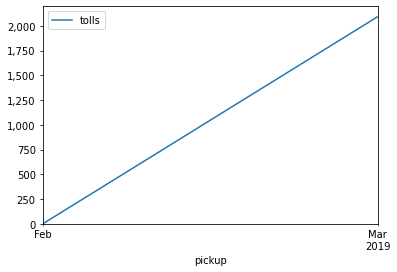

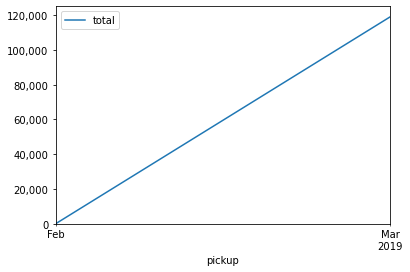

Plotting yearly data


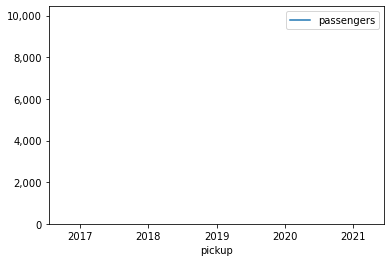

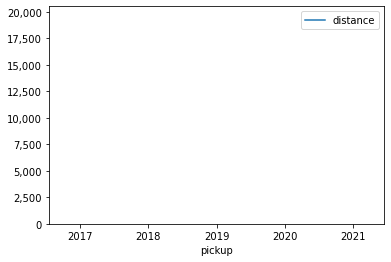

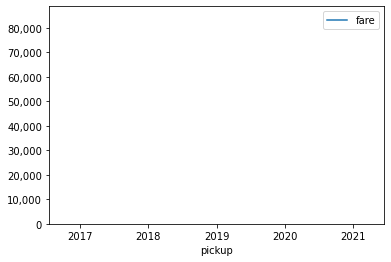

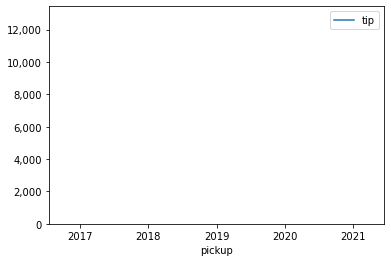

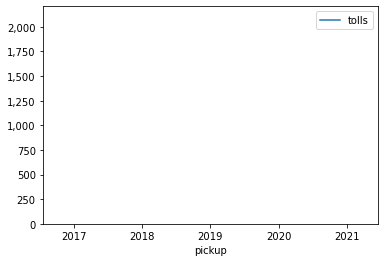

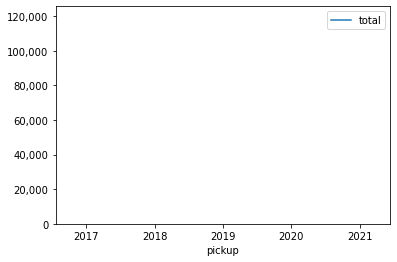

Plotting daily data


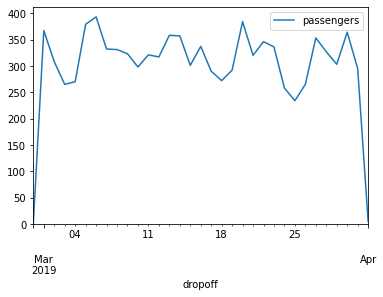

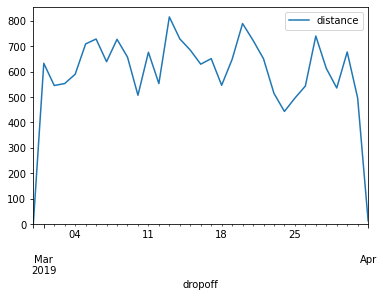

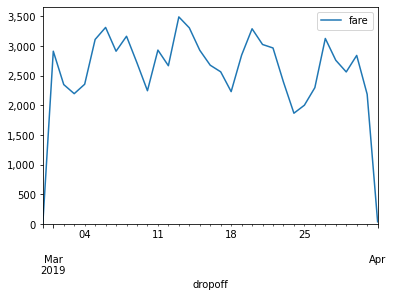

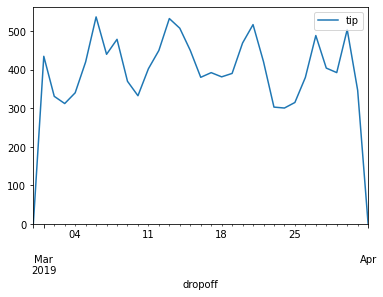

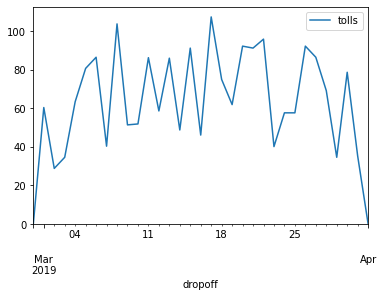

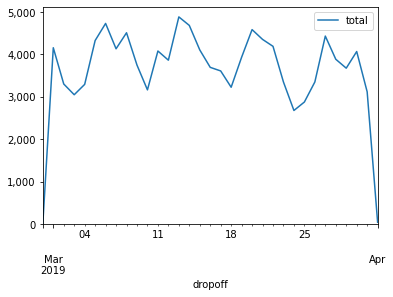

Plotting monthly data


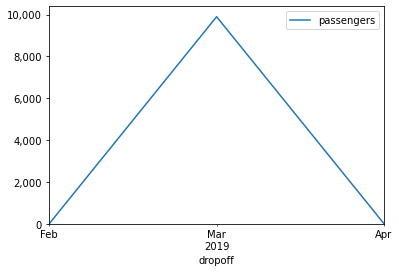

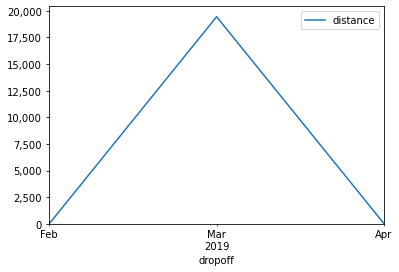

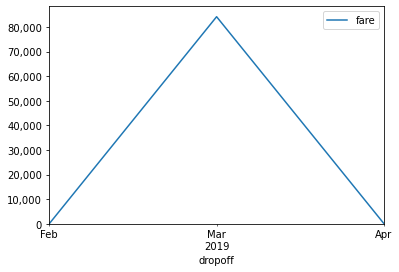

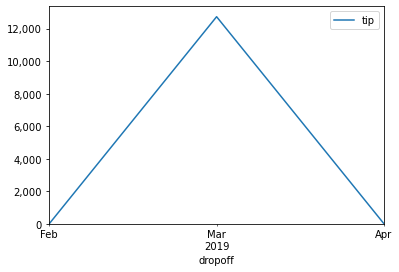

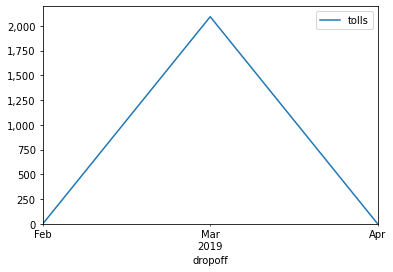

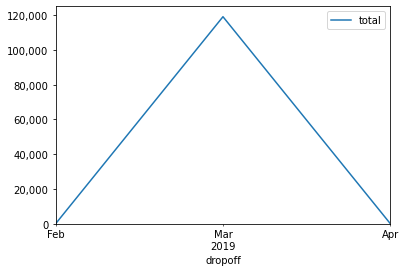

Plotting yearly data


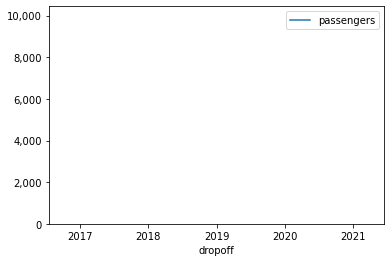

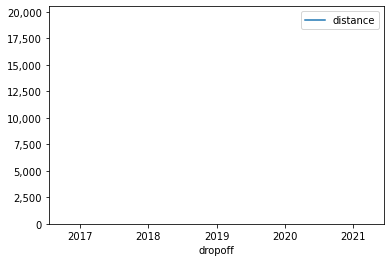

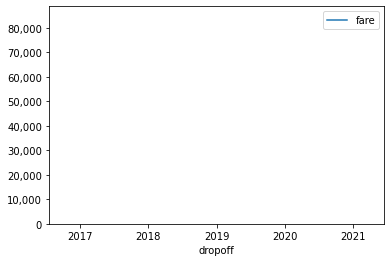

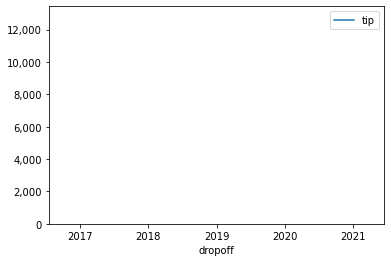

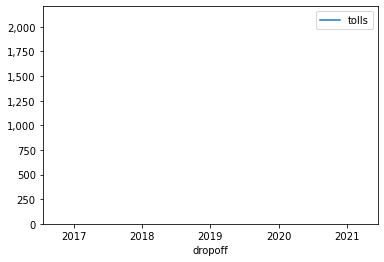

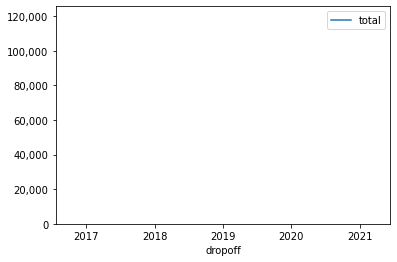

In [17]:
eda(df)

In [10]:
df.corr().style.background_gradient(cmap='crest')

,passengers,distance,fare,tip,tolls,total
passengers,1.000000,0.006844,0.003349,0.031389,-0.005689,0.024795
distance,0.006844,1.000000,0.925744,0.287309,0.364831,0.874097
fare,0.003349,0.925744,1.000000,0.308048,0.370392,0.947263
tip,0.031389,0.287309,0.308048,1.000000,0.173974,0.499290
tolls,-0.005689,0.364831,0.370392,0.173974,1.000000,0.380027
total,0.024795,0.874097,0.947263,0.499290,0.380027,1.000000
